# Electric Vehicle Segmentation
* Github Link: 
* Project Type: Un-Supervised ML/ Clustering
* By : Md Ismail Quraishi

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda

In [2]:
# Load the data
path = 'data/car data.csv'
df = eda.getDf(path)

First five rows :
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

shape of the data : (301, 9)
duplicate rows : 2

columns : 
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

null values in each column :
               null_count  null_%
index                            
Car_Name                0     0.0
Year              

**About the dataset**
1. The dataset has 301 rows and 9 columns with 2 duplicate rows and 0 nan values.
2. Selling Price has mean 4.66, median 3.6 and max 35. Since the difference between mean, median and max is huge therefore we can say there are some outliers.
3. Present Price has mean 7.62, median 6.40 and max 92. Since the difference between mean, median and max is huge therefore we can say there are some outliers.
4. Since this  is a clustering project therefore we would not go for outlier treatment.

## EDA

In [3]:
eda.EDA(df)

Duplicate rows successfully dropped
Top 5 car names by highest selling price
Car_Name
land cruiser    35.000000
fortuner        18.254000
innova          12.777778
creta           11.800000
elantra         11.600000
Name: Selling_Price, dtype: float64

Top 5 car names by highest present price
Car_Name
land cruiser     92.600000
fortuner         30.745000
camry            23.730000
innova           17.846667
corolla altis    17.582500
Name: Present_Price, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
Mean Median Max of Fuel Type = Petrol
                       mean    median        max
Year            2013.539749   2014.00    2017.00
Selling_Price      3.264184      2.65      19.75
Present_Price      5.583556      4.60      23.73
Kms_Driven     33528.937238  25870.00  500000.00

Mean Median Max of Fuel Type = Diesel
                       mean    median       max
Year 

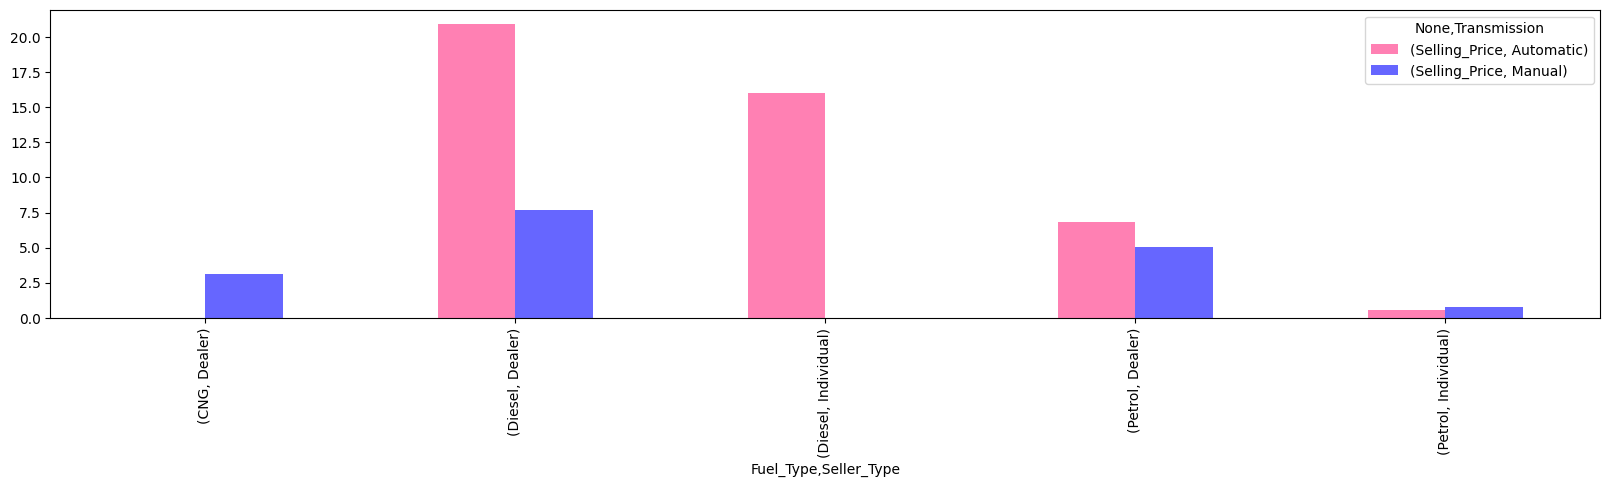

In [4]:
cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
plt.rcParams['figure.figsize']=(20,4)
round(df.groupby(['Fuel_Type','Seller_Type', 'Transmission'])[['Selling_Price']].mean(),2).unstack().plot.bar(color=['#ff80b3','#6666ff'])
plt.show()

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df['text'] = df['Car_Name'].apply(lambda x:x.replace(' ',''))

<Axes: xlabel='Selling_Price', ylabel='Count'>

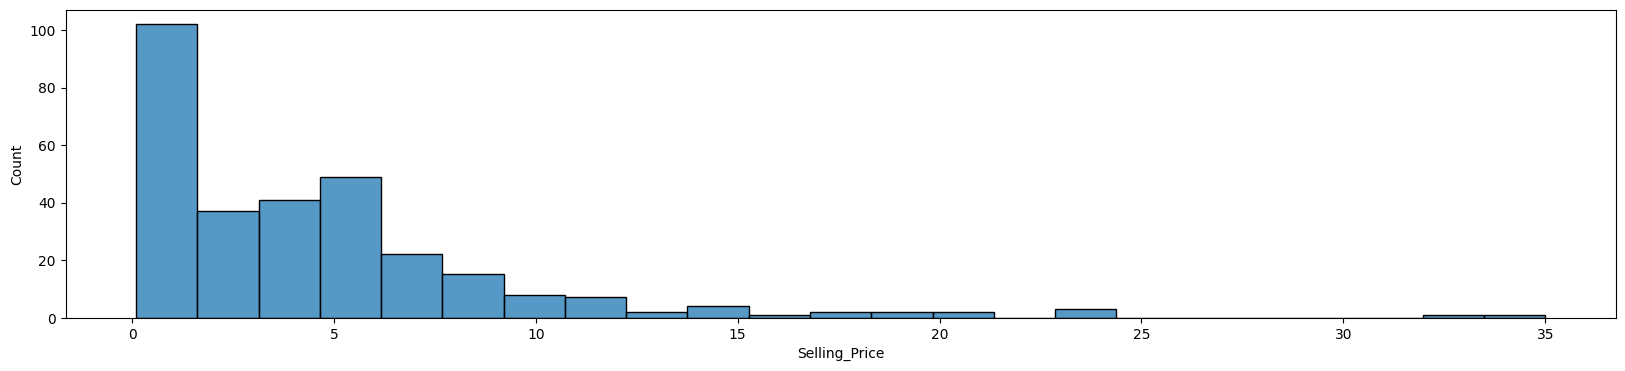

In [7]:
# df['text']+' '+df['Year'].astype('str')
sns.histplot(df['Selling_Price'])

In [8]:
df['Selling_Price'].quantile([.05,.10,.2,.4,.6,.75])
def binning(x):
    col = 'Selling_Price'
    lower = df[col].quantile(.4)
    upper = df[col].quantile(.8)
    if x <= lower:
        return 'lowsp'
    elif x > lower and x < upper:
        return 'middlesp'
    else:
        return 'highsp'

In [9]:
df['Selling_Price'].apply(binning)

0      middlesp
1      middlesp
2        highsp
3      middlesp
4      middlesp
         ...   
296      highsp
297    middlesp
298    middlesp
299      highsp
300    middlesp
Name: Selling_Price, Length: 299, dtype: object